In [1]:
from __future__ import division

from sympy import *
init_printing(use_unicode=True)

In [2]:
il, ir, i0 = symbols("i_{l} i_{r} i0", real=True)
Ml, Cl = symbols("M_{l} C_{l}", positive=True)
Mr, Cr = symbols("M_{r} C_{r}", positive=True)
R0, Rload, Rg, L0, С0 = symbols("R0 R_{load} R_{g} L0 С0", positive=True)
omega, omega0, omegal, omegar = symbols("\\omega \\omega_{0} \\omega_{l} \\omega_{r}", positive=True)
C0, Csum0, Csuml, Csumr = symbols("C0 C_{\\Sigma0} C_{{\\Sigma}l} C_{{\\Sigma}r}", positive=True)
Q0, Ql, Qr, Ll, Lr, Rl, Rr = symbols("Q0 Q_{l} Q_{r} L_{l} L_{r} R_{l} R_{r}", positive=True)
chig, chiload = symbols("\\chi_{g} \\chi_{load}", positive=True)
Kel, Ker, Khl, Khr = symbols("K^{e}_{l} K^{e}_{r} K^{h}_{l} K^{h}_{r}", positive=True)
f, f0, fl, fr, fg = symbols("f f0 f_{l} f_{r} f_{g}", positive=True)
xl, xr, x0 = symbols("x_{l} x_{r} x0", real=True)
Pg, phi, t = symbols("P_{g} \\varphi t", positive=True)
u, U0 = symbols("u U0", real=True)
d2i0, di0 = symbols("\\frac{d^2i_0}{dt^2} \\frac{di_0}{dt}", real=True)
d2iL, diL = symbols("\\frac{d^2i_L}{dt^2} \\frac{di_L}{dt}", real=True)
d2iR, diR = symbols("\\frac{d^2i_R}{dt^2} \\frac{di_R}{dt}", real=True)
d2x0, dx0 = symbols("\\frac{d^2x_0}{dt^2} \\frac{dx_0}{dt}", real=True)
d2xl, dxl = symbols("\\frac{d^2x_L}{dt^2} \\frac{dx_L}{dt}", real=True)
d2xr, dxr = symbols("\\frac{d^2x_R}{dt^2} \\frac{dx_R}{dt}", real=True)

$U_{C_{L}} + U_{M_{L}} + U_{L_{0}} + U_{C_{0}} + U_{R_{0}} + U_{R_g} + U_{R_{load}} + U_{C_{R}} + U_{M_{R}} = u$

$\frac 1{C_{L}} \int {(i_0 - i_L) dt} + L_0 \frac{di_0}{dt} +
\frac 1{C_0} \int {i_0 dt} + R_0 i_0 + R_g i_0 + R_{load} i_0 +
\frac 1{C_{R}} \int {(i_0 - i_R) dt} +
M_{L} \frac{di_L}{dt} +
M_{R} \frac{di_0}{dt} = e$

$\frac 1{C_{L}} (i_0 - i_L) + L_0 \frac{d^2 i_0}{dt^2} +
\frac 1{C_0} i_0 + R_0 \frac {di_0}{dt} + R_g \frac {di_0}{dt} + R_{load} \frac {di_0}{dt} +
\frac 1{C_{R}} (i_0 - i_R) +
M_L \frac{d^2 i_L}{dt^2} +
M_R \frac{d^2 i_R}{dt^2} = e '$

$-\frac 1{C_{L}} i_L + L_0 \frac{d^2 i_0}{dt^2} +
\frac 1{C_{\Sigma0}} i_0 + R_0 \frac {di_0}{dt} + R_g \frac {di_0}{dt} + R_{load} \frac {di_0}{dt} +
\frac 1{C_{R}} i_R +
M_L \frac{d^2 i_L}{dt^2} +
M_R \frac{d^2 i_R}{dt^2} = e '$

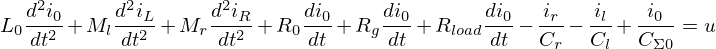

In [3]:
equation = Eq(-1/Cl*il+L0*d2i0+i0/Csum0+R0*di0+Rg*di0+Rload*di0-1/Cr*ir+Ml*d2iL+Mr*d2iR,u)
equation

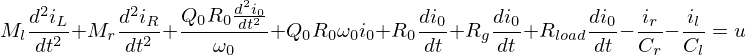

In [4]:
substitute = solve(Eq(Q0,omega0*L0/R0),L0,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Q0,1/(omega0*Csum0*R0)),Csum0,dict=1)[0]
equation = equation.subs(substitute)
equation

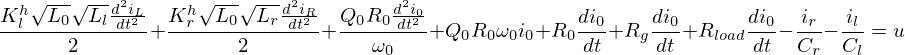

In [5]:
substitute = solve(Eq(Khl,2*Ml/sqrt(L0*Ll)),Ml,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Khr,2*Mr/sqrt(L0*Lr)),Mr,dict=1)[0]
equation = equation.subs(substitute)
equation

In [6]:
substitute = solve(Eq(Kel,2*sqrt(Csum0*Csuml)/Cl),Cl,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(Ker,2*sqrt(Csum0*Csumr)/Cr),Cr,dict=1)[0]
equation = equation.subs(substitute)
equation

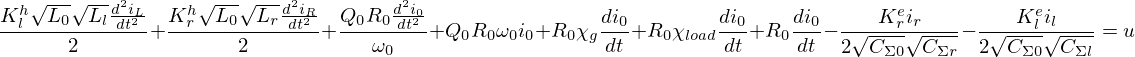

In [7]:
substitute = solve(Eq(chig,Rg/R0),Rg,dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(chiload,Rload/R0),Rload,dict=1)[0]
equation = equation.subs(substitute)
equation

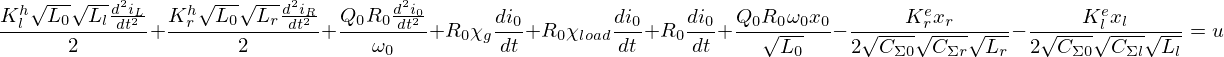

In [8]:
substitute = {il: xl/sqrt(Ll)}
equation = equation.subs(substitute)
substitute = {ir: xr/sqrt(Lr)}
equation = equation.subs(substitute)
substitute = {i0: x0/sqrt(L0)}
equation = equation.subs(substitute)
equation

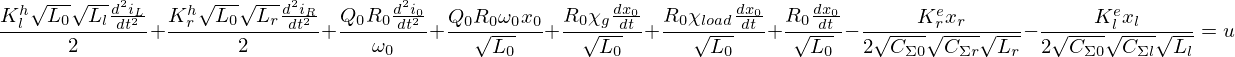

In [9]:
substitute = {diL: dxl/sqrt(Ll)}
equation = equation.subs(substitute)
substitute = {diR: dxr/sqrt(Lr)}
equation = equation.subs(substitute)
substitute = {di0: dx0/sqrt(L0)}
equation = equation.subs(substitute)
equation

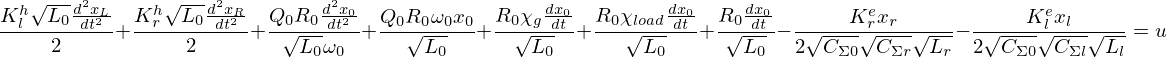

In [10]:
substitute = {d2iL: d2xl/sqrt(Ll)}
equation = equation.subs(substitute)
substitute = {d2iR: d2xr/sqrt(Lr)}
equation = equation.subs(substitute)
substitute = {d2i0: d2x0/sqrt(L0)}
equation = equation.subs(substitute)
equation

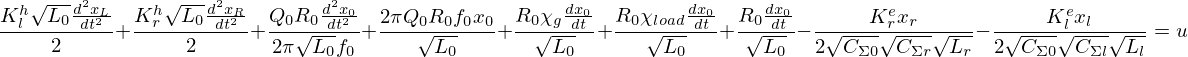

In [11]:
substitute = {omega: 2*pi*f}
equation = equation.subs(substitute)
substitute = {omegar: 2*pi*fr}
equation = equation.subs(substitute)
substitute = {omegal: 2*pi*fl}
equation = equation.subs(substitute)
substitute = {omega0: 2*pi*f0}
equation = equation.subs(substitute)
equation

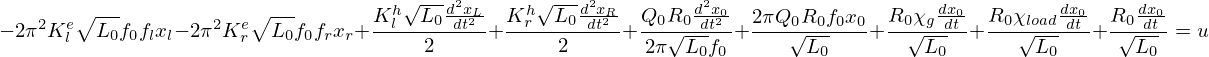

In [12]:
substitute = solve(Eq(1/(2*pi*sqrt(L0)*sqrt(Csum0)), f0), Csum0, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Ll)*sqrt(Csuml)), fl), Csuml, dict=1)[0]
equation = equation.subs(substitute)
substitute = solve(Eq(1/(2*pi*sqrt(Lr)*sqrt(Csumr)), fr), Csumr, dict=1)[0]
equation = equation.subs(substitute)
equation

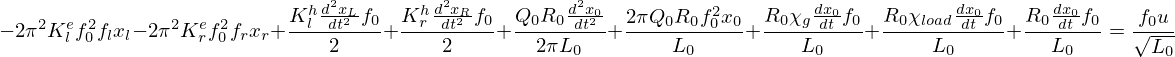

In [13]:
substitute = f0/sqrt(L0)
equation = Eq(expand(equation.lhs*substitute), equation.rhs*substitute)
equation

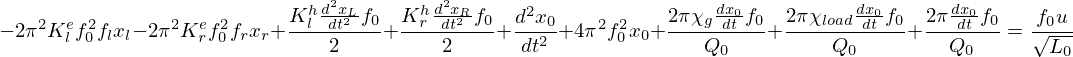

In [14]:
substitute = solve(Eq(Q0,2*pi*L0/R0),R0,dict=1)[0]
equation = equation.subs(substitute)
equation

In [15]:
substitute = {u: fg*U0*cos(2*pi*fg*t+phi)}
equation = equation.subs(substitute)
equation

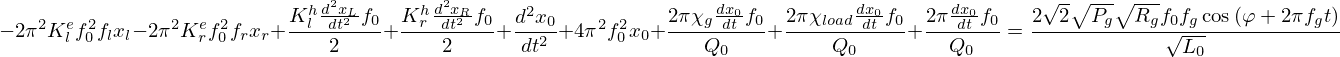

In [16]:
substitute = {U0: 2*sqrt(2*Pg*Rg)}
equation = equation.subs(substitute)
equation

In [17]:
substitute = solve(Eq(Q0,2*pi*L0/R0),L0,dict=1)[0]
equation = equation.subs(substitute)
equation

In [18]:
substitute = solve(Eq(chig,Rg/R0),Rg,dict=1)[0]
equation = equation.subs(substitute)
equation